<a href="https://colab.research.google.com/github/ChiomaO15/ChiomaO15/blob/main/FRUIT_RECOGNITION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *IMPORT THE NECESSARY DATASETS*

In [1]:
pip install imutils

In [2]:
from imutils import paths
import cv2

In [3]:
imagePaths = list(paths.list_images('/content/drive/MyDrive/Fruits'))

In [4]:
imagePaths

['/content/drive/MyDrive/Fruits/Kiwi/38_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/33_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/35_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/37_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/34_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/36_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/41_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/39_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/3_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/40_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/56_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/52_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/54_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/45_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/50_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/58_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/44_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/46_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/5_100.jpg',
 '/content/drive/MyDrive/Fruits/Kiwi/4_100.jpg',
 '/

In [5]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# *LOAD THE FRUIT DATA*

In [19]:
dirs = os.listdir('/content/drive/MyDrive/Fruits')
for dir in dirs:
  print(dir)

Kiwi
pear
pomegranate
Pineapple


In [20]:
base_dir = '/content/drive/MyDrive/Fruits'
img_size = 224
batch = 32

# *SEPARATE THE DATA SET INTO TRAINING AND VALIDATION DATA*

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed =123,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        batch_size=batch,
                                                        image_size = (img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size = batch,
                                                      image_size = (img_size,img_size))

Found 560 files belonging to 4 classes.
Using 448 files for training.
Found 560 files belonging to 4 classes.
Using 112 files for validation.


In [29]:
fruit_name = train_ds.class_names
fruit_name

['Kiwi', 'Pineapple', 'pear', 'pomegranate']

# *PLOT THE FRUIT DATA*

In [30]:
import matplotlib.pyplot as plt

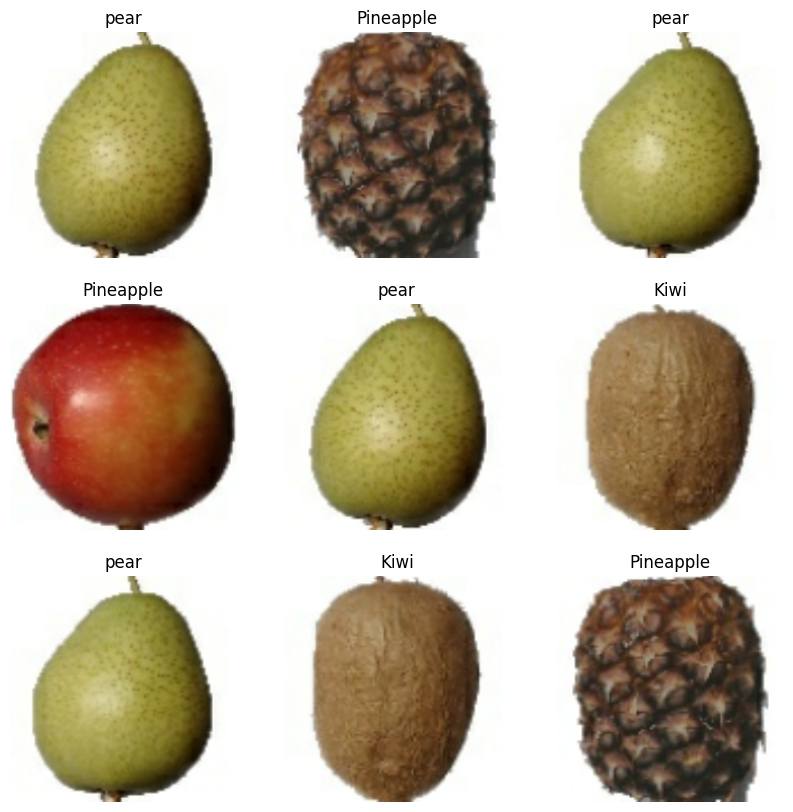

In [31]:
plt.figure(figsize =(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruit_name[labels[i]])
        plt.axis('off')

# *IMPROVEMENT OF THE MODEL USING AUTOTUNE*

In [32]:
AUTOTUNE = tf.data.AUTOTUNE

In [33]:
train_ds = train_ds.cache().shuffle(250).prefetch(buffer_size=AUTOTUNE)

In [34]:
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

# *DATA AUGUMENTATION*

In [48]:
data_augmentation = Sequential ([
     layers.RandomFlip("horizontal",input_shape =(img_size,img_size,3)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1)
])

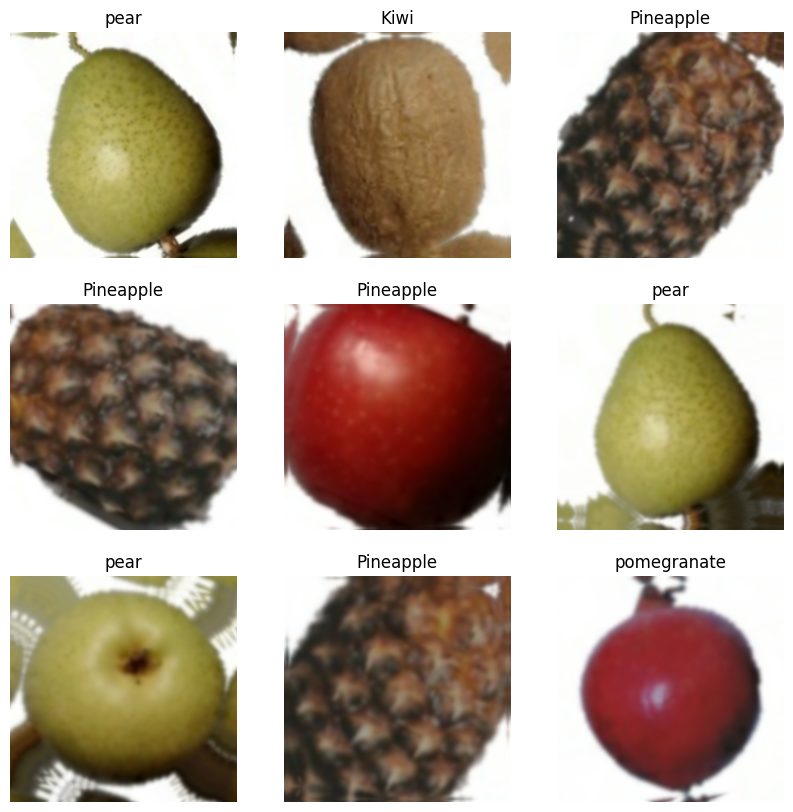

In [38]:
# Ensure the variable name is spelled correctly
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Initialize the variable with the Sequential model
# This assumes that the layers and img_size variables are defined and accessible

i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)  # Corrected variable name
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruit_name[labels[i]])
        plt.axis('off')

# *Model Creation*

In [49]:
# Ensure the data_augmentation layer is the first layer in the model
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_size, img_size, 3)),  # Add the input_shape argument
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [51]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                 

# *MODEL FITTING*

In [53]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
14/14 [==============================] - 61s 4s/step - loss: 1.5623 - accuracy: 0.3884 - val_loss: 0.9641 - val_accuracy: 0.5893
Epoch 2/15
14/14 [==============================] - 32s 2s/step - loss: 0.5888 - accuracy: 0.7835 - val_loss: 0.2330 - val_accuracy: 0.9911
Epoch 3/15
14/14 [==============================] - 31s 2s/step - loss: 0.2802 - accuracy: 0.9062 - val_loss: 0.0806 - val_accuracy: 1.0000
Epoch 4/15
14/14 [==============================] - 31s 2s/step - loss: 0.0727 - accuracy: 0.9821 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 6/15
14/14 [==============================] - 32s 2s/step - loss: 0.0425 - accuracy: 0.9888 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7/15
14/14 [==============================] - 30s 2s/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 8/15
14/14 [==============================] - 31s 2s/step - loss: 0.0150 - accuracy: 0.9978 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 9/15
14/14 [==

# *USING THE MODEL FOR PREDICTION*

In [58]:
input_image = tf.keras.utils.load_img('/content/drive/MyDrive/Fruits/Kiwi/33_100.jpg', target_size=(224,224))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
fruit_name[np.argmax(result)]

1/1 [==============================] - 0s 38ms/step


'Kiwi'

In [59]:
input_image = tf.keras.utils.load_img('/content/drive/MyDrive/Fruits/pomegranate/324_100.jpg', target_size=(224,224))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
fruit_name[np.argmax(result)]

1/1 [==============================] - 0s 58ms/step


'pomegranate'

In [69]:
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path, target_size=(224,224))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array, axis=0)

  predictions = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(predictions[0])
  outcome = 'The Image belongs to ' + fruit_name[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
  return outcome

In [70]:
classify_images('/content/drive/MyDrive/Fruits/Kiwi/35_100.jpg')

1/1 [==============================] - 0s 61ms/step


'The Image belongs to Kiwi with a score of 99.98929500579834'

# *SAVING THE MODEL*

In [73]:
model.save('Fruit_Recog_Model.h5')